In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import keras.models as Models
import keras.layers as Layers
import keras.backend as Backend
import numpy as np

D:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\conda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a

# Импорт выборки

In [2]:
image_size = (32,32)
path_train= '.\\data\\train'
path_test = '.\\data\\test'

In [3]:
train_data = keras.preprocessing.image.ImageDataGenerator(
)

train_set = train_data.flow_from_directory(
    path_train,
    target_size=image_size,
    batch_size=1000,
    color_mode='rgb',
    classes=['alpha','beta','gamma','delta','epsilon'],
    class_mode='categorical',
    shuffle=True,
    seed=42
)

test_data = keras.preprocessing.image.ImageDataGenerator(
)

test_set = test_data.flow_from_directory(
    path_test,
    target_size = image_size,
    batch_size = 500,
    color_mode='rgb',
    classes=['alpha','beta','gamma','delta','epsilon'],
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [4]:
# преобразуем в отдельные массивы

X_train = train_set[0][0].astype(np.uint8)
Y_train = train_set[0][1].astype(np.uint8)

X_test = test_set[0][0].astype(np.uint8)
Y_test = test_set[0][1].astype(np.uint8)

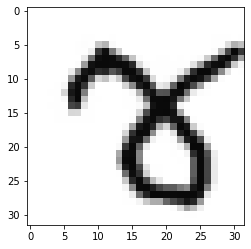

In [5]:
# отобразим один символ

plt.imshow(X_train[7])

In [6]:
# проверим, совпадает ли ванхот кодирование символа

Y_train[7]

array([0, 0, 1, 0, 0], dtype=uint8)

In [7]:
# нормируем тренировочную и тестовую выборку

X_train = X_train.astype(np.float32) / 255.0

X_test =  X_test.astype(np.float32) / 255.0

In [8]:
# cоздадим полную выборку

X_train_full = np.concatenate([X_train, X_test])
Y_train_full = np.concatenate([Y_train, Y_test])

# Однослойная сеть

In [9]:
num_classes = 5
num_epochs = 100
batch = 128

In [14]:
# cначала тренировочная выборка - 2 участика, тестовая - третий

Backend.clear_session()

In [17]:
model = Models.Sequential()
model.add(Layers.Flatten(input_shape= X_train.shape[1:]))

model.add(Layers.Dense(output_dim = num_classes,
                       activation='softmax'
                      )
         )

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )


D:\conda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=5)`
  """


In [18]:
model.fit(X_train,
          Y_train,
          batch_size = batch,
          epochs=num_epochs,
          validation_data = (X_test,  Y_test)
         )


Train on 1000 samples, validate on 500 samples
Epoch 1/100
1000/1000 [==============================] - 0s 276us/step - loss: 2.3105 - accuracy: 0.2210 - val_loss: 2.5747 - val_accuracy: 0.2620
Epoch 2/100
1000/1000 [==============================] - 0s 43us/step - loss: 1.8520 - accuracy: 0.2810 - val_loss: 1.8435 - val_accuracy: 0.2140
Epoch 3/100
1000/1000 [==============================] - 0s 43us/step - loss: 1.3287 - accuracy: 0.4710 - val_loss: 1.5864 - val_accuracy: 0.2720
Epoch 4/100
1000/1000 [==============================] - 0s 44us/step - loss: 1.1353 - accuracy: 0.6190 - val_loss: 1.5331 - val_accuracy: 0.2300
Epoch 5/100
1000/1000 [==============================] - 0s 44us/step - loss: 0.9886 - accuracy: 0.7310 - val_loss: 1.5600 - val_accuracy: 0.2980
Epoch 6/100
1000/1000 [==============================] - 0s 45us/step - loss: 0.8779 - accuracy: 0.7540 - val_loss: 1.4795 - val_accuracy: 0.3580
Epoch 7/100
1000/1000 [==============================] - 0s 44us/step - los

1000/1000 [==============================] - 0s 44us/step - loss: 0.1273 - accuracy: 0.9740 - val_loss: 1.1648 - val_accuracy: 0.5800
Epoch 56/100
1000/1000 [==============================] - 0s 44us/step - loss: 0.1218 - accuracy: 0.9830 - val_loss: 1.1670 - val_accuracy: 0.5800
Epoch 57/100
1000/1000 [==============================] - 0s 46us/step - loss: 0.1193 - accuracy: 0.9800 - val_loss: 1.2363 - val_accuracy: 0.5460
Epoch 58/100
1000/1000 [==============================] - 0s 46us/step - loss: 0.1200 - accuracy: 0.9830 - val_loss: 1.2049 - val_accuracy: 0.5260
Epoch 59/100
1000/1000 [==============================] - 0s 45us/step - loss: 0.1178 - accuracy: 0.9800 - val_loss: 1.1240 - val_accuracy: 0.5840
Epoch 60/100
1000/1000 [==============================] - 0s 45us/step - loss: 0.1164 - accuracy: 0.9840 - val_loss: 1.1826 - val_accuracy: 0.5720
Epoch 61/100
1000/1000 [==============================] - 0s 45us/step - loss: 0.1150 - accuracy: 0.9810 - val_loss: 1.2151 - val_a

In [13]:
model.evaluate(X_test,  Y_test, verbose = 1)

500/500 [==============================] - 0s 112us/step


[1.267066053390503, 0.5640000104904175]

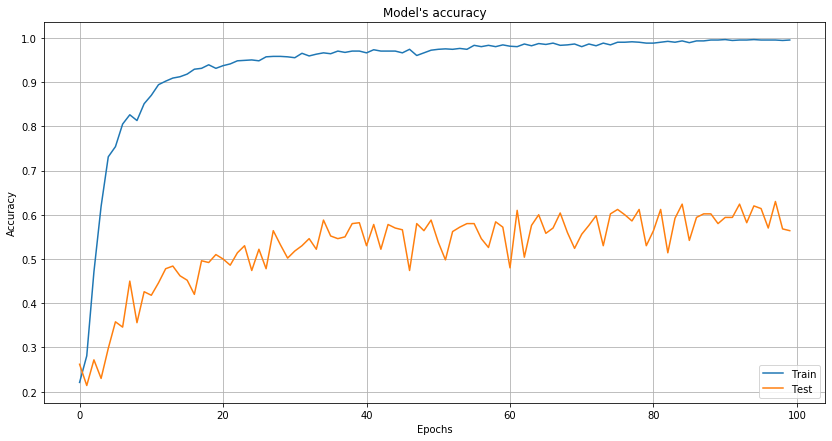

In [19]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.grid()
plt.title('Model\'s accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')    

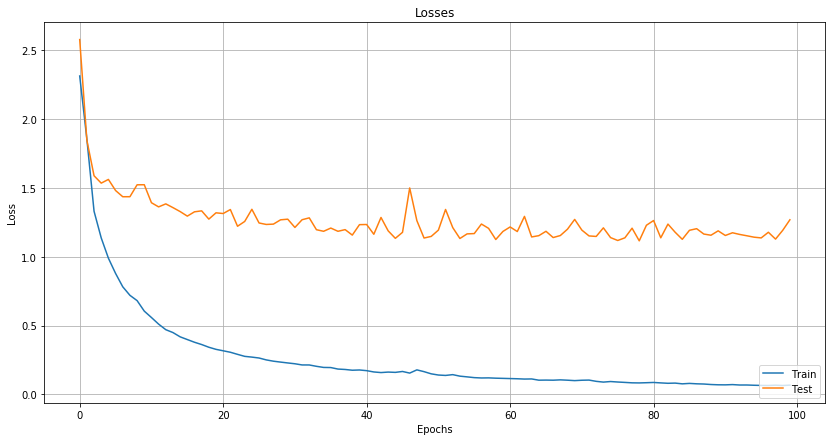

In [20]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.grid()
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

In [21]:
# попробуем 80 процентов всей выборки на обучение, 20 на тест

Backend.clear_session()

In [22]:
model = Models.Sequential()
model.add(Layers.Flatten(input_shape= X_train_full.shape[1:]))

model.add(Layers.Dense(output_dim = num_classes,
                       activation='softmax'
                      )
         )

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

D:\conda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=5)`
  """


In [23]:
model.fit(X_train_full,
          Y_train_full,
          batch_size = batch,
          epochs = num_epochs,
          validation_split= 0.2
         )

Train on 1200 samples, validate on 300 samples
Epoch 1/100
1200/1200 [==============================] - 0s 118us/step - loss: 2.1427 - accuracy: 0.2042 - val_loss: 1.6455 - val_accuracy: 0.3000
Epoch 2/100
1200/1200 [==============================] - 0s 48us/step - loss: 1.5769 - accuracy: 0.2992 - val_loss: 1.5416 - val_accuracy: 0.3100
Epoch 3/100
1200/1200 [==============================] - 0s 48us/step - loss: 1.3051 - accuracy: 0.4633 - val_loss: 1.3700 - val_accuracy: 0.4300
Epoch 4/100
1200/1200 [==============================] - 0s 51us/step - loss: 1.1260 - accuracy: 0.6217 - val_loss: 1.3049 - val_accuracy: 0.4200
Epoch 5/100
1200/1200 [==============================] - 0s 50us/step - loss: 0.9518 - accuracy: 0.7200 - val_loss: 1.1627 - val_accuracy: 0.6433
Epoch 6/100
1200/1200 [==============================] - 0s 53us/step - loss: 0.8785 - accuracy: 0.7617 - val_loss: 1.1338 - val_accuracy: 0.5867
Epoch 7/100
1200/1200 [==============================] - 0s 49us/step - loss

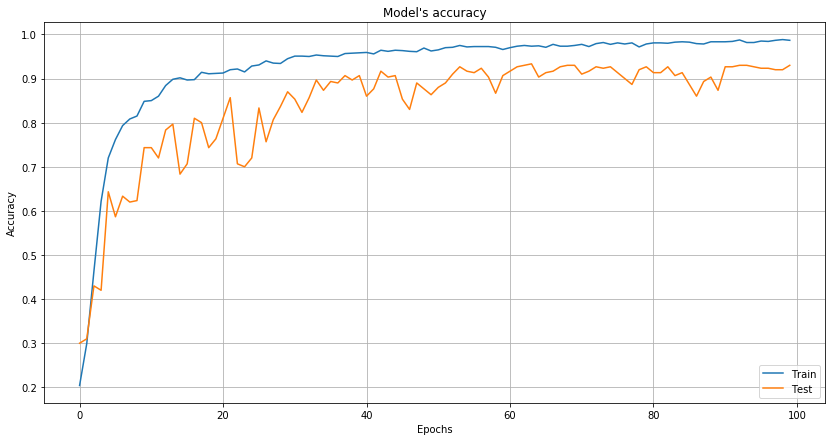

In [24]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.grid()
plt.title('Model\'s accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

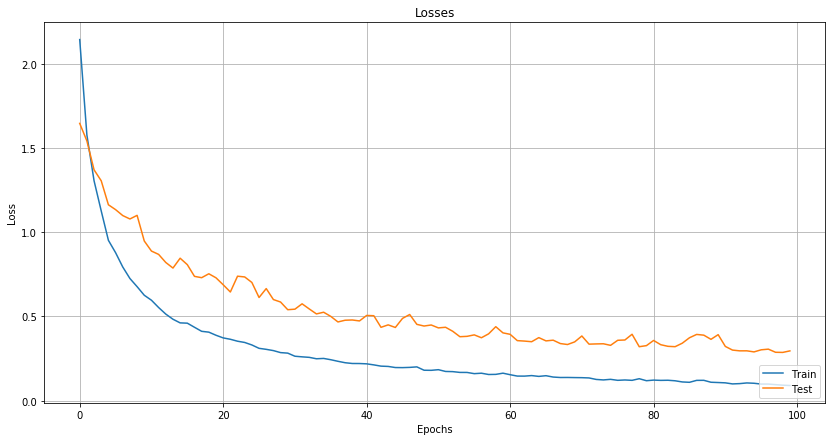

In [25]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.grid()
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

# Несколько слоёв

In [26]:
num_epochs = 100
batch = 128
hidden_size1 = 512
hidden_size2 = 256
hidden_size3 = 128

In [27]:
# аналогично cначала тренировочная выборка - 2 участика, тестовая - третий

Backend.clear_session()

In [28]:
inp = Layers.Input(shape = X_train.shape[1:])

flat = Layers.Flatten(input_shape = X_train.shape[1:])(inp)

hidden_1 = Layers.Dense(output_dim = hidden_size1,
                        activation='relu')(flat)

hidden_2 = Layers.Dense(output_dim = hidden_size1,
                        activation='relu')(hidden_1)

hidden_3 = Layers.Dense(output_dim = hidden_size2,
                        activation='relu')(hidden_2)

hidden_4 = Layers.Dense(output_dim = hidden_size2,
                        activation='relu')(hidden_3)

hidden_5 = Layers.Dense(output_dim = hidden_size3,
                        activation='relu')(hidden_4)

out = Layers.Dense(num_classes,
                   activation='softmax')(hidden_5)

model = Models.Model(input=inp, output=out)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

D:\conda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512)`
  
D:\conda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512)`
  if __name__ == '__main__':
D:\conda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  if sys.path[0] == '':
D:\conda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  from ipykernel import kernelapp as app
D:\conda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
D:\conda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de..

In [29]:
model.fit(
	X_train,
	Y_train,
	batch_size = batch,
	epochs = num_epochs,
    validation_data=(X_test, Y_test)
)

Train on 1000 samples, validate on 500 samples
Epoch 1/100
1000/1000 [==============================] - 0s 306us/step - loss: 2.0896 - accuracy: 0.2250 - val_loss: 1.8826 - val_accuracy: 0.2000
Epoch 2/100
1000/1000 [==============================] - 0s 106us/step - loss: 1.7005 - accuracy: 0.2510 - val_loss: 1.6969 - val_accuracy: 0.2000
Epoch 3/100
1000/1000 [==============================] - 0s 105us/step - loss: 1.5366 - accuracy: 0.3170 - val_loss: 1.6693 - val_accuracy: 0.2080
Epoch 4/100
1000/1000 [==============================] - 0s 104us/step - loss: 1.3589 - accuracy: 0.4300 - val_loss: 1.6181 - val_accuracy: 0.3780
Epoch 5/100
1000/1000 [==============================] - 0s 102us/step - loss: 1.1372 - accuracy: 0.4580 - val_loss: 1.7622 - val_accuracy: 0.3800
Epoch 6/100
1000/1000 [==============================] - 0s 104us/step - loss: 1.1145 - accuracy: 0.5420 - val_loss: 1.8371 - val_accuracy: 0.2720
Epoch 7/100
1000/1000 [==============================] - 0s 107us/step 

In [30]:
model.evaluate(X_test,  Y_test, verbose = 1)

500/500 [==============================] - 0s 134us/step


[2.4244767417907713, 0.6179999709129333]

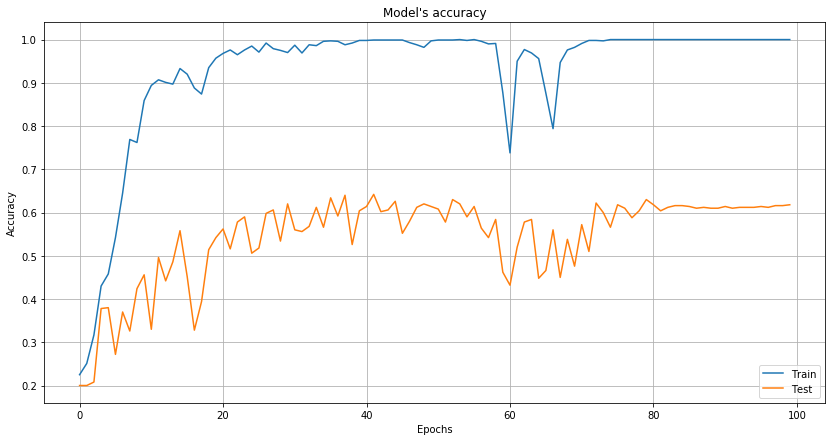

In [31]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.grid()
plt.title('Model\'s accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

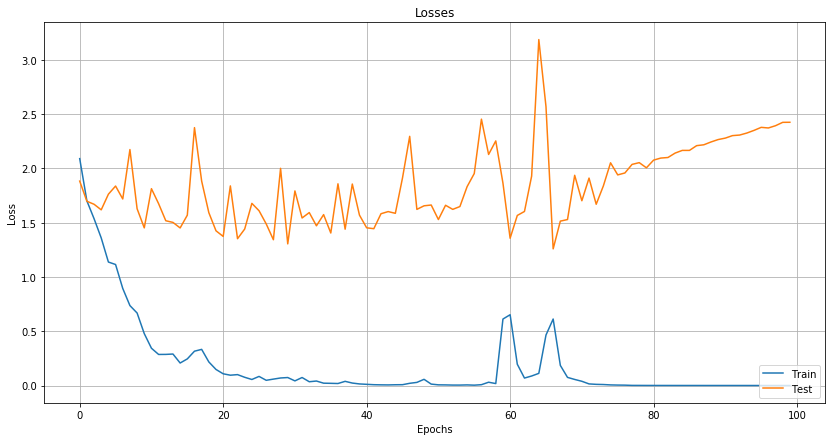

In [32]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.grid()
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

In [33]:
# теперь попробуем 80 процентов всей выборки на обучение, 20 на тест

Backend.clear_session()

In [34]:
inp = Layers.Input(shape = X_train.shape[1:])

flat = Layers.Flatten(input_shape = X_train.shape[1:])(inp)

hidden_1 = Layers.Dense(output_dim = hidden_size1,
                        activation='relu')(flat)

hidden_2 = Layers.Dense(output_dim = hidden_size1,
                        activation='relu')(hidden_1)

hidden_3 = Layers.Dense(output_dim = hidden_size2,
                        activation='relu')(hidden_2)

hidden_4 = Layers.Dense(output_dim = hidden_size2,
                        activation='relu')(hidden_3)

hidden_5 = Layers.Dense(output_dim = hidden_size3,
                        activation='relu')(hidden_4)

out = Layers.Dense(num_classes,
                   activation='softmax')(hidden_5)

model = Models.Model(input=inp, output=out)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

D:\conda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512)`
  
D:\conda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512)`
  if __name__ == '__main__':
D:\conda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  if sys.path[0] == '':
D:\conda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  from ipykernel import kernelapp as app
D:\conda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
D:\conda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de..

In [35]:
model.fit(X_train_full,
          Y_train_full,
          batch_size = batch,
          epochs = num_epochs,
          validation_split= 0.2
         )

Train on 1200 samples, validate on 300 samples
Epoch 1/100
1200/1200 [==============================] - 0s 257us/step - loss: 2.2067 - accuracy: 0.2200 - val_loss: 1.7798 - val_accuracy: 0.1933
Epoch 2/100
1200/1200 [==============================] - 0s 101us/step - loss: 1.7003 - accuracy: 0.2075 - val_loss: 1.6368 - val_accuracy: 0.3033
Epoch 3/100
1200/1200 [==============================] - 0s 100us/step - loss: 1.6149 - accuracy: 0.2633 - val_loss: 1.6976 - val_accuracy: 0.1667
Epoch 4/100
1200/1200 [==============================] - 0s 99us/step - loss: 1.5484 - accuracy: 0.2783 - val_loss: 1.5461 - val_accuracy: 0.4900
Epoch 5/100
1200/1200 [==============================] - 0s 100us/step - loss: 1.3953 - accuracy: 0.4758 - val_loss: 1.5008 - val_accuracy: 0.3000
Epoch 6/100
1200/1200 [==============================] - 0s 101us/step - loss: 1.2727 - accuracy: 0.5250 - val_loss: 1.3737 - val_accuracy: 0.3867
Epoch 7/100
1200/1200 [==============================] - 0s 99us/step - 

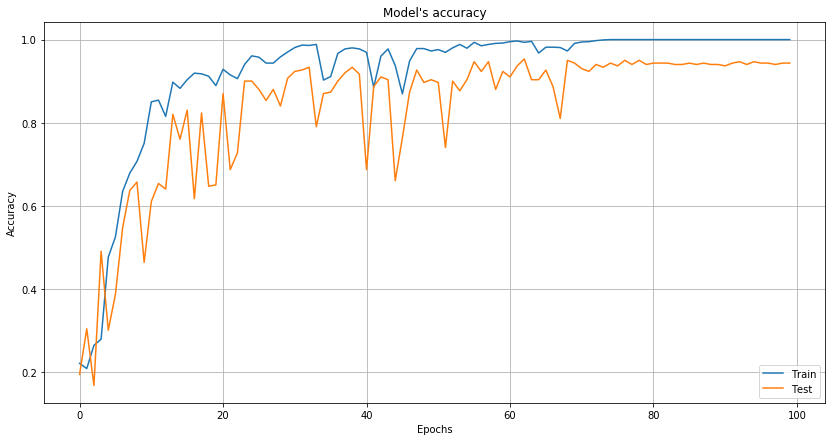

In [36]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.grid()
plt.title('Model\'s accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   

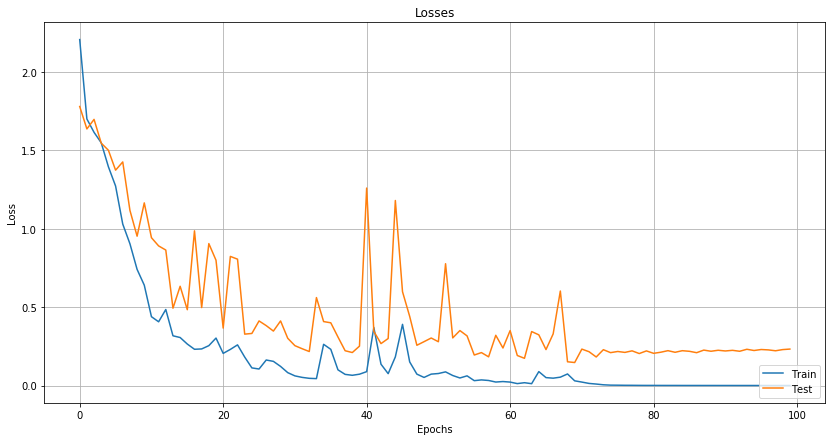

In [37]:
plt.figure(figsize=[14,7])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.grid()
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')   